In [1]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

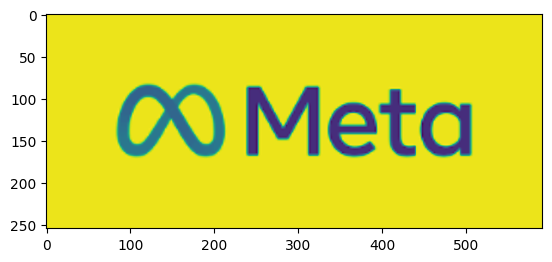

In [2]:
#Reading the source and sub images
img_c = cv2.imread('/content/resizedImage (1).png')
template = cv2.imread('/content/download.png',0) #Reading sub image in grey mode
img = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY) 
plt.imshow(img)

In [3]:
template.shape
img_c.shape

(255, 591, 3)

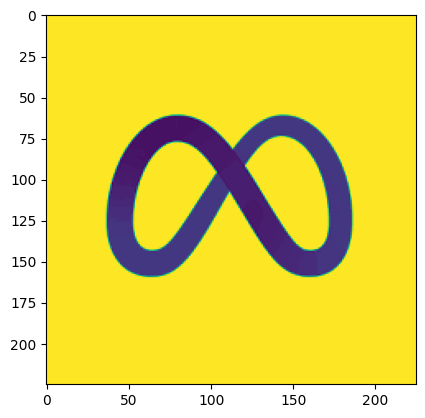

In [4]:
plt.imshow(template)


In [5]:
def Normalised_Cross_Correlation(roi, target):
    # Normalised Cross Correlation Equation
    cor=np.sum(roi*target)
    nor = np.sqrt((np.sum(roi**2)))*np.sqrt(np.sum(target**2))
    return cor / nor

In [6]:
def template_matching(img, target):
    # initial parameter
    height,width=img.shape
    tar_height,tar_width=target.shape
    (max_Y,max_X)=(0, 0)
    MaxValue = 0

    # Set image, target and result value matrix
    img=np.array(img, dtype="int")
    target=np.array(target, dtype="int")
    NccValue=np.zeros((height-tar_height,width-tar_width))

    # calculate value using filter-kind operation from top-left to bottom-right
    for y in range(0,height-tar_height):
        for x in range(0,width-tar_width):
            # image roi
            roi=img[y:y+tar_height,x:x+tar_width]
            # calculate ncc value
            NccValue[y,x] = Normalised_Cross_Correlation(roi,target)
            # find the most match area
            if NccValue[y,x]>MaxValue:
                MaxValue=NccValue[y,x]
                (max_Y,max_X) = (y,x)

    return (max_X,max_Y)

In [7]:
# Call the template matching function
top_left_cord=template_matching(img, template)
#Calculating remaining coordinates
top_right_cord=(top_left_cord[0]+template.shape[1]-1,top_left_cord[1])
bottom_left=(top_left_cord[0],top_left_cord[1]+template.shape[0]-1)
bottom_right=(bottom_left[0]+template.shape[1]-1,bottom_left[1])
print(f'coordinates are {top_left_cord},{top_right_cord},{bottom_left},{bottom_right}')

coordinates are (37, 20),(261, 20),(37, 244),(261, 244)


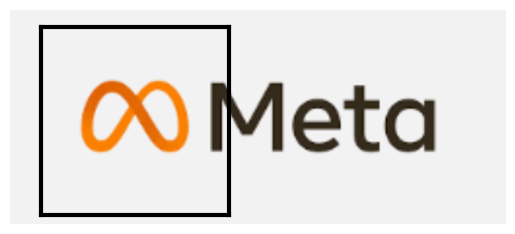

In [10]:
# plt.figure(figsize=(15,15))
plt.plot([top_left_cord[0],top_right_cord[0]], [top_left_cord[1],top_right_cord[1]],
         color="black", linewidth=3)
plt.plot([bottom_left[0],bottom_right[0]], [bottom_left[1],bottom_right[1]],
         color="black", linewidth=3)
plt.plot([top_left_cord[0],bottom_left[0]],[top_left_cord[1],bottom_left[1]],
         color='black', linewidth=3)
plt.plot([top_right_cord[0],bottom_right[0]],[top_right_cord[1],bottom_right[1]],
         color='black', linewidth=3)
plt.imshow(img_c)
plt.axis('off')
plt.show()